<a href="https://colab.research.google.com/github/AMaheshVardhan/Zeotap-Assignment/blob/main/MaheshVardhan_Akena_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

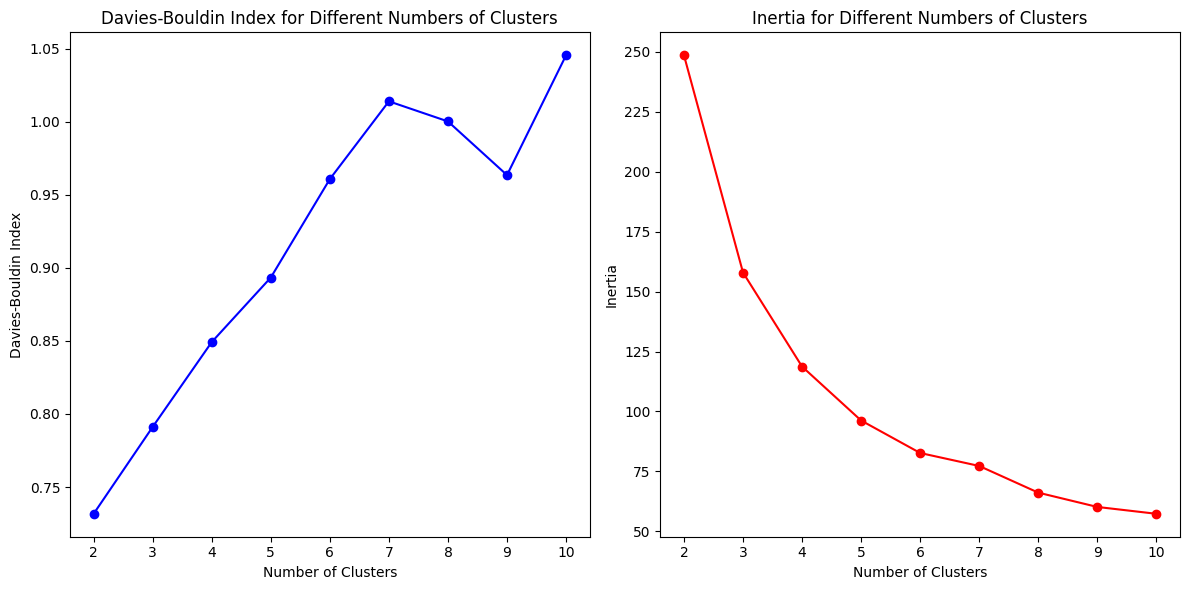

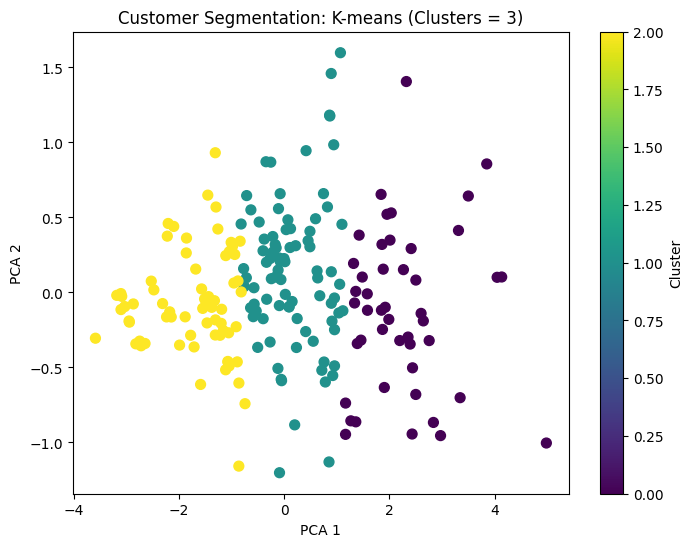

Optimal Number of Clusters: 3
Davies-Bouldin Index for optimal clusters: 0.7911608347812669


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

customers = pd.read_csv('/content/Data/Customers.csv')
transactions = pd.read_csv('/content/Data/Transactions.csv')
customers = customers.fillna(0)
transactions = transactions.fillna(0)
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
customer_features = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    unique_products=('ProductID', 'nunique')).reset_index()
customers_data = pd.merge(customers, customer_features, on='CustomerID', how='left')
customers_data = customers_data.fillna(0)
scaler = StandardScaler()
features = ['total_spending', 'total_quantity', 'unique_products']
customers_data[features] = scaler.fit_transform(customers_data[features])

db_scores = []
inertia_values = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customers_data[features])
    db_score = davies_bouldin_score(customers_data[features], kmeans.labels_)
    db_scores.append(db_score)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), db_scores, marker='o', color='blue')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertia_values, marker='o', color='red')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customers_data['Cluster'] = kmeans.fit_predict(customers_data[features])
db_index = davies_bouldin_score(customers_data[features], customers_data['Cluster'])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customers_data[features])
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=customers_data['Cluster'], cmap='viridis', s=50)
plt.title(f'Customer Segmentation: K-means (Clusters = {optimal_clusters})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

print(f'Optimal Number of Clusters: {optimal_clusters}')
print(f'Davies-Bouldin Index for optimal clusters: {db_index}')
